<a href="https://colab.research.google.com/github/code-dreamer21/Evaluation-Projects/blob/master/Cat_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cat_and_dog CNN model

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "sristidasgupta"
os.environ['KAGGLE_KEY'] = "9cb1a1b4ba5078197ac527e1cad0ccd7"
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.6MB/s]
 96% 521M/543M [00:23<00:01, 16.9MB/s]
100% 543M/543M [00:23<00:00, 24.1MB/s]
 98% 265M/271M [00:10<00:00, 48.8MB/s]
100% 271M/271M [00:10<00:00, 28.3MB/s]


In [ ]:
#upload data
from zipfile import ZipFile

file_name = "/content/train.zip" 

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
data_dir_list =os.listdir('/content/train')

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)


25000


In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('total training cat images', len(os.listdir(train_cats_dir)))
print('total training dog images', len(os.listdir(train_dogs_dir)))

print('total validation cat images', len(os.listdir(validation_cats_dir)))
print('total validation dog images', len(os.listdir(validation_dogs_dir)))

print('total test cat images', len(os.listdir(test_cats_dir)))
print('total test dog images', len(os.listdir(test_dogs_dir)))

total training cat images 1000
total training dog images 1000
total validation cat images 500
total validation dog images 500
total test cat images 500
total test dog images 500


In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')


validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6884 - acc: 0.5445 - val_loss: 0.6101 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6661 - acc: 0.5905 - val_loss: 0.7449 - val_acc: 0.5450
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6278 - acc: 0.6435 - val_loss: 0.7194 - val_acc: 0.6100
Epoch 4/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5839 - acc: 0.6850 - val_loss: 0.7561 - val_acc: 0.6450
Epoch 5/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5442 - acc: 0.7285 - val_loss: 0.5252 - val_acc: 0.7150
Epoch 6/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5122 - acc: 0.7465 - val_loss: 0.5540 - val_acc: 0.7150
Epoch 7/30
100/100 [==============================] - 6s 64ms/step - loss: 0.4768 - acc: 0.7685 - val_loss: 0.4726 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 6s 63ms/step 

below plot shows training is getting better but validation is not doing so well. it is a case of overfitting.

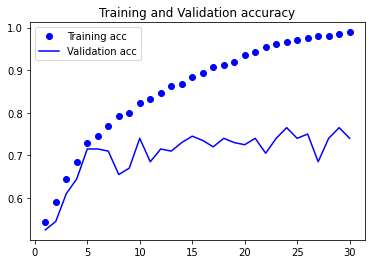

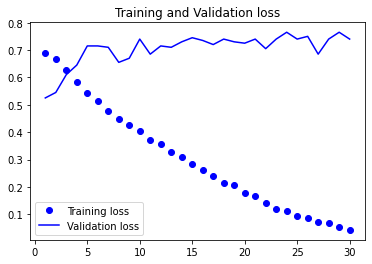

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

we therefore add dropout

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Doing data augmentation with training data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')


validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


saving model after removing overfitting and augmenting data, we decrease no.of epochs to 20 and increase validation steps to 50

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/20
100/100 [==============================] - 22s 215ms/step - loss: 0.6954 - acc: 0.4915 - val_loss: 0.6951 - val_acc: 0.5500
Epoch 2/20
100/100 [==============================] - 20s 199ms/step - loss: 0.6900 - acc: 0.5395 - val_loss: 0.6734 - val_acc: 0.6130
Epoch 3/20
100/100 [==============================] - 20s 198ms/step - loss: 0.6773 - acc: 0.5810 - val_loss: 0.7488 - val_acc: 0.5560
Epoch 4/20
100/100 [==============================] - 20s 199ms/step - loss: 0.6613 - acc: 0.5965 - val_loss: 0.6398 - val_acc: 0.5900
Epoch 5/20
100/100 [==============================] - 20s 199ms/step - loss: 0.6539 - acc: 0.6195 - val_loss: 0.5929 - val_acc: 0.6490
Epoch 6/20
100/100 [==============================] - 20s 199ms/step - loss: 0.6454 - acc: 0.6280 - val_loss: 0.7201 - val_acc: 0.6050
Epoch 7/20
100/100 [==============================] - 20s 198ms/step - loss: 0.6287 - acc: 0.6345 - val_loss: 0.6359 - val_acc: 0.6590
Epoch 8/20
100/100 [==============================] - 2

Now below plot shows that our training and validation accuracy are both increasing and validation loss is decreasing compared to previous validation loss curve


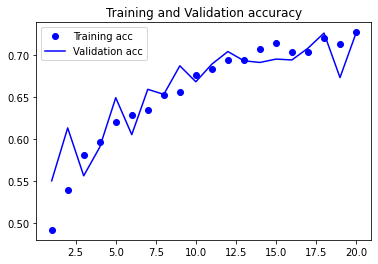

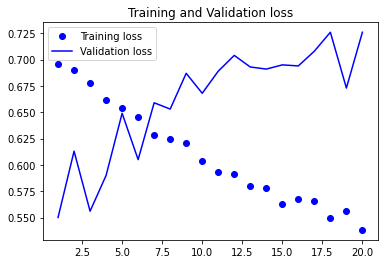

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()